# WeatherPy

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [5]:
coord_list = list(lat_lngs)

In [6]:
# Identify nearest city for each lat, lng combination
for lat_lng in coord_list:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Save config information.
base_weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_weather_url}appid={weather_api_key}&units={units}&q="

In [ ]:
len(cities)

In [ ]:
response = requests.get(query_url + cities[22]).json()
response

In [ ]:
response['main']['temp_max']

In [ ]:
# set up lists to hold reponse info
good_cities = []
count = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(city)
    try:
        response = requests.get(query_url + city).json()
        # Checking to ensure all data needed is available before accepting city
        check = response['name']
        check = response['coord']['lat']
        check = response['coord']['lon']
        check = response['main']['temp_max']
        check = response['main']['humidity']
        check = response['clouds']['all']
        check = response['wind']['speed']
        check = response['sys']['country']
        check = response['dt']
        print(f"Processing city {count} | {response['name']}")
        good_cities.append(response)
        count += 1
    except:
        print("City not available. Skipping...")

In [ ]:
len(good_cities)

In [ ]:
# Grab just the city name to start a dataframe
start_cities = []
for i in range(len(good_cities)):
    start_cities.append(good_cities[i]['name'])

In [ ]:
start_cities

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
city_data_df = pd.DataFrame({ 'City' : start_cities,
                            'Lat' : "",
                            'Lon' : "",
                            'Max Temp' : "",
                            'Humidity' : "",
                            'Cloudiness' : "",
                            'Wind Speed' : "",
                            'Country' : "",
                            'Date' : ""
                            })

In [ ]:
city_data_df

In [ ]:
for index, row in city_data_df.iterrows():
    city_data_df.loc[index,'City'] = good_cities[index]['name']
    city_data_df.loc[index,'Lat'] = good_cities[index]['coord']['lat']
    city_data_df.loc[index,'Lon'] = good_cities[index]['coord']['lon']
    city_data_df.loc[index,'Max Temp'] = good_cities[index]['main']['temp_max']
    city_data_df.loc[index,'Humidity'] = good_cities[index]['main']['humidity']
    city_data_df.loc[index,'Cloudiness'] = good_cities[index]['clouds']['all']
    city_data_df.loc[index,'Wind Speed'] = good_cities[index]['wind']['speed']
    city_data_df.loc[index,'Country'] = good_cities[index]['sys']['country']
    city_data_df.loc[index,'Date'] = good_cities[index]['dt']
     

In [ ]:
city_data_df

In [ ]:
city_data_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [4]:
city_data_df.describe()

,Unnamed: 0,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.00000,570.000000,5.700000e+02
mean,284.500000,20.668446,20.926674,69.888281,72.608772,54.52807,8.043456,1.659646e+09
std,164.689101,33.678032,90.157150,13.836390,19.125051,39.01836,5.718997,1.411808e+02
min,0.000000,-54.800000,-179.166700,36.790000,17.000000,0.00000,0.000000,1.659645e+09
25%,142.250000,-7.947150,-57.794725,59.510000,63.000000,14.25000,3.945000,1.659646e+09
50%,284.500000,24.083350,26.325000,71.555000,76.500000,62.50000,6.910000,1.659646e+09
75%,426.750000,48.743450,98.743100,79.300000,88.000000,97.00000,10.672500,1.659646e+09
max,569.000000,78.218600,179.316700,105.370000,100.000000,100.00000,36.820000,1.659646e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [22]:
# re- import saved city_data_df if needed to avoid having to make the API calls again.  comment out if not needed
city_data_df = pd.read_csv(output_data_file)

In [23]:
city_data_df.drop(columns=['Unnamed: 0'], inplace=True)

In [24]:
city_data_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,49.06,92,93,5.93,ZA,1659645944
1,Thunder Bay,48.4001,-89.3168,76.91,41,20,6.91,CA,1659645944
2,The Valley,18.2170,-63.0578,86.14,66,40,17.27,AI,1659645945
3,Tefé,-3.3542,-64.7114,84.31,74,75,3.44,BR,1659645945
4,Sitka,57.0531,-135.3300,60.69,77,100,5.75,US,1659645945
...,...,...,...,...,...,...,...,...,...
565,Fuerte Olimpo,-21.0415,-57.8738,78.10,56,61,9.53,PY,1659646128
566,Boden,65.8252,21.6886,62.60,89,69,4.61,SE,1659646128
567,Stornoway,58.2093,-6.3865,52.93,83,20,3.44,GB,1659646129
568,Yatou,37.1500,122.3833,77.81,96,4,6.82,CN,1659646129


In [29]:
date = datetime.fromtimestamp(city_data_df.iloc[0,8]).strftime("%A, %B %d, %Y %I:%M:%S") # from stackoverflow

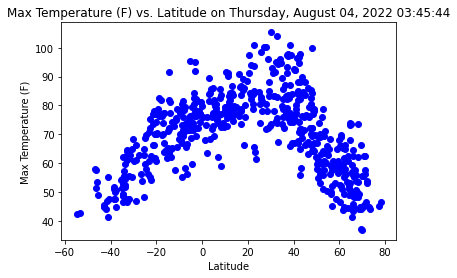

In [44]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', color='blue')
plt.title(f"Max Temperature (F) vs. Latitude on {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/max_temp_vs_lat.png")
plt.show()

In the plot above we can clearly see a trend of max temperatures highest near the equator and going down from there generally
yet all the highest values are between 20 and 40 degrees north latitude.

## Latitude vs. Humidity Plot

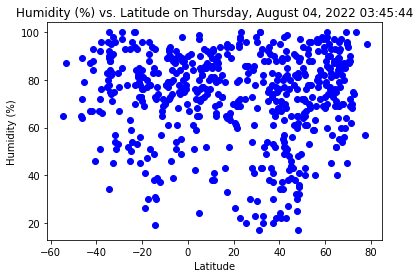

In [45]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', color='blue')
plt.title(f"Humidity (%) vs. Latitude on {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/humidity_vs_lat.png")
plt.show()

In the humidity map above there seems to be no correlation to latitude

## Latitude vs. Cloudiness Plot

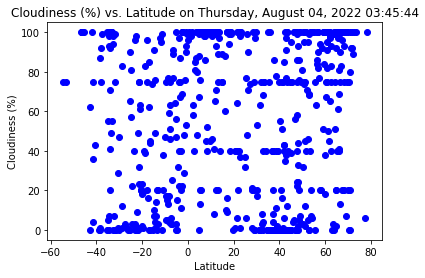

In [46]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', color='blue')
plt.title(f"Cloudiness (%) vs. Latitude on {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/cloudiness_vs_lat.png")
plt.show()

Again no apparent correlation with latitude, though there is an interesting banding occuring with the percents, which may have to do with how cloudiness is recorded.

## Latitude vs. Wind Speed Plot

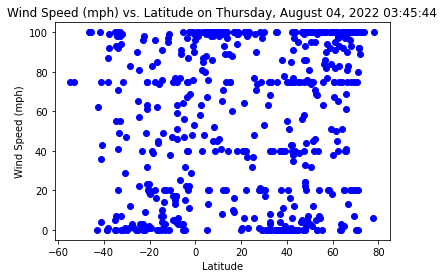

In [47]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', color='blue')
plt.title(f"Wind Speed (mph) vs. Latitude on {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/wind_speed_vs_lat.png")
plt.show()

Also similar to cloudiness there is again no apparent correlation with latitude, though there is an interesting banding occuring with the percents, which may also have to do with how the data is recorded.

## Linear Regression

In [12]:
northern_cities_df = city_data_df.loc[ city_data_df['Lat'] >= 0 ]  #Just deciding that Lat = 0 will go with northern

In [13]:
northern_cities_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Thunder Bay,48.4001,-89.3168,76.91,41,20,6.91,CA,1659645944
2,The Valley,18.2170,-63.0578,86.14,66,40,17.27,AI,1659645945
4,Sitka,57.0531,-135.3300,60.69,77,100,5.75,US,1659645945
5,George Town,5.4112,100.3354,80.89,90,20,0.00,MY,1659645692
6,Kapaa,22.0752,-159.3190,84.11,71,20,9.22,US,1659645666
...,...,...,...,...,...,...,...,...,...
564,Moyale,3.5167,39.0584,68.47,59,100,14.61,KE,1659646128
566,Boden,65.8252,21.6886,62.60,89,69,4.61,SE,1659646128
567,Stornoway,58.2093,-6.3865,52.93,83,20,3.44,GB,1659646129
568,Yatou,37.1500,122.3833,77.81,96,4,6.82,CN,1659646129


In [14]:
southern_cities_df = city_data_df.loc[ city_data_df['Lat'] < 0 ]

In [15]:
southern_cities_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,49.06,92,93,5.93,ZA,1659645944
3,Tefé,-3.3542,-64.7114,84.31,74,75,3.44,BR,1659645945
7,Rikitea,-23.1203,-134.9692,70.93,70,96,19.35,PF,1659645946
8,Punta Arenas,-53.1500,-70.9167,42.82,87,75,4.61,CL,1659645946
10,Mahébourg,-20.4081,57.7000,70.09,73,20,12.66,MU,1659645947
...,...,...,...,...,...,...,...,...,...
551,Vaitape,-16.5167,-151.7500,77.38,78,45,25.39,PF,1659646123
556,Cuamba,-14.8031,36.5372,71.26,49,91,1.81,MZ,1659646124
558,Quatre Cocos,-20.2078,57.7625,69.91,71,19,16.35,MU,1659646125
563,Mogapi,-22.3230,27.8349,62.42,53,0,2.75,BW,1659646127


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 5.363902444612275e-47 and the r^2 is: 0.41753442103379645


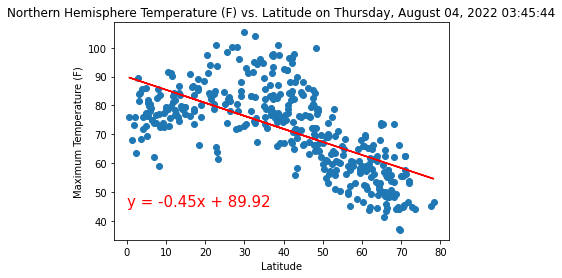

In [50]:
x_values = northern_cities_df['Lat']
y_values = northern_cities_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,45),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Temperature (F) vs. Latitude on {date}")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.savefig("../Images/NH_linregress_vs_lat.png")
print(f"The p-value is: {pvalue} and the r^2 is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 1.882963815255622e-40 and the r^2 is: 0.6234263723696981


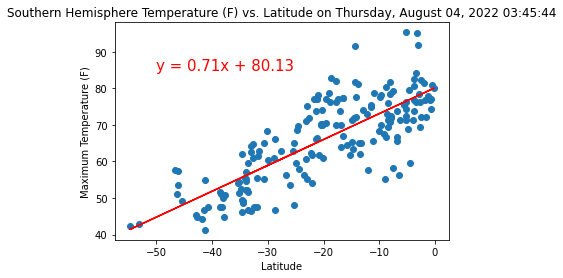

In [49]:
x_values = southern_cities_df['Lat']
y_values = southern_cities_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.title(f"Southern Hemisphere Temperature (F) vs. Latitude on {date}")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.savefig("../Images/SH_linregress_vs_lat.png")
print(f"The p-value is: {pvalue} and the r^2 is: {rvalue**2}")
plt.show()

With this small of a p-value we can reject the null hypothysis that latitude has no effect on maximum temperature, though with the middlish r^2 it means there is a lot of variation at each point.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 0.28433730326294104 and the r^2 is: 0.0029844300977427984


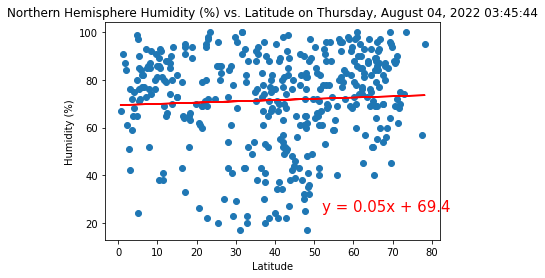

In [48]:
x_values = northern_cities_df['Lat']
y_values = northern_cities_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(52,25),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Humidity (%) vs. Latitude on {date}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Images/NH_humidity_linregress_vs_lat.png")
print(f"The p-value is: {pvalue} and the r^2 is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 0.6662342416274616 and the r^2 is: 0.0010244772613962625


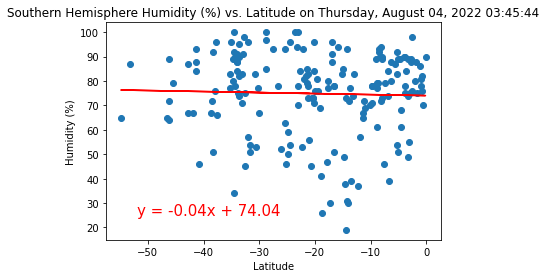

In [51]:
x_values = southern_cities_df['Lat']
y_values = southern_cities_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,25),fontsize=15,color="red")
plt.title(f"Southern Hemisphere Humidity (%) vs. Latitude on {date}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Images/SH_humidity_vs_lat.png")
print(f"The p-value is: {pvalue} and the r^2 is: {rvalue**2}")
plt.show()

When it comes to humidity, the relationship is clear that we cannot reject the null hypothysis.  The r^2 also tells us that the data is all over the place as well.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 0.8272404144955303 and the r^2 is: 0.00012418945162953065


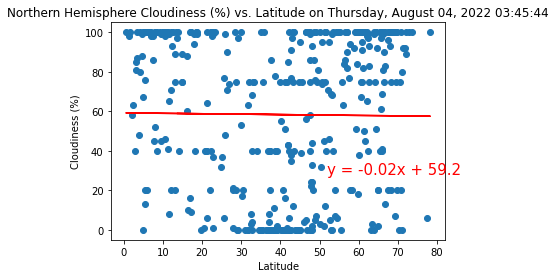

In [52]:
x_values = northern_cities_df['Lat']
y_values = northern_cities_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(52,28),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Cloudiness (%) vs. Latitude on {date}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../Images/NH_cloudiness_vs_lat.png")
print(f"The p-value is: {pvalue} and the r^2 is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 0.24370291295703073 and the r^2 is: 0.0074598507826141415


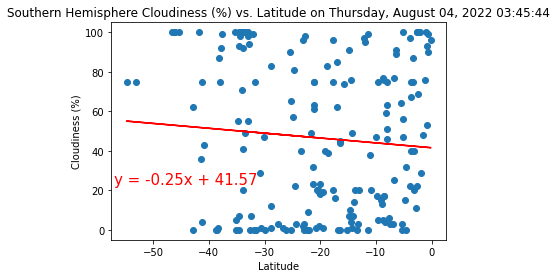

In [53]:
x_values = southern_cities_df['Lat']
y_values = southern_cities_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,23),fontsize=15,color="red")
plt.title(f"Southern Hemisphere Cloudiness (%) vs. Latitude on {date}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../Images/SH_cloudiness_vs_lat.png")
print(f"The p-value is: {pvalue} and the r^2 is: {rvalue**2}")
plt.show()

Here we can see that we cannot reject the null hypothysis, and there is almost no relationship, though we can see a slight trend in the southern hemisphere that looks like there may be fewer clouds near the south pole, though it may be biased as there is also not as many populations in the south.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 0.00048822032804386273 and the r^2 is: 0.03121071804134685


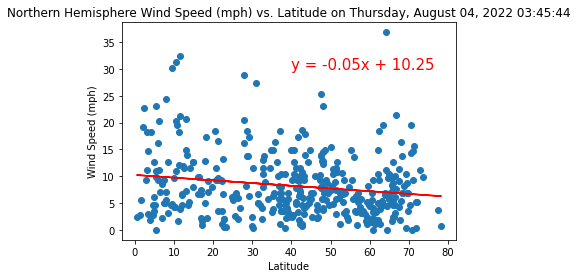

In [54]:
x_values = northern_cities_df['Lat']
y_values = northern_cities_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Wind Speed (mph) vs. Latitude on {date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../Images/NH_windspeed_vs_lat.png")
print(f"The p-value is: {pvalue} and the r^2 is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 0.08861642767329803 and the r^2 is: 0.01584723586902937


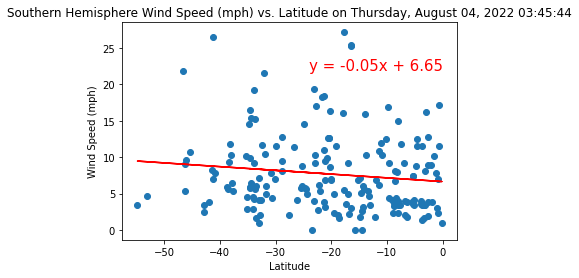

In [55]:
x_values = southern_cities_df['Lat']
y_values = southern_cities_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-24,22),fontsize=15,color="red")
plt.title(f"Southern Hemisphere Wind Speed (mph) vs. Latitude on {date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../Images/SH_windspeed_vs_lat.png")
print(f"The p-value is: {pvalue} and the r^2 is: {rvalue**2}")
plt.show()

Here we can see that we cannot fully reject the null hypothysis except in the northern latitudes though the relationship is only slight.  Both linear regressions have the same slope so there is a symmetry which may make sense logically as the surface velocity of earth is greatest along the equator.

In all cases these seem logical given that temperature is driven partly by the amount of incident light on the surface of the Earth which decreases per unit area as you go away from the equator.  Also wind clouds and humidity are all connected.  Humidity is associated with water, which is everywhere and the winds move the clouds.